### Problem statement:
We want to build a model which will predict whether a particular customer will churn or not. The target variable here is ‘Churn’(the variable of interest) ,it will tell us whether or not a particular customer has churned.



I have used decisionTree and logistic model

## Dataset Description:

customerID: Customer ID


gender: Customer gender (female, male)


SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)

       
Partner: Whether the customer has a partner or not (Yes, No)

        
Dependents: Whether the customer has dependents or not (Yes, No)

        
tenure: Number of months the customer has stayed with the company

        
PhoneService: Whether the customer has a phone service or not (Yes, No)

       
MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)


InternetService: Customer’s internet service provider (DSL, Fiber optic, No)


OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)

        
OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)

       
DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)

        
TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)

        
StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)


StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)

   
Contract: The contract term of the customer (Month-to-month, One year, Two year)

        
PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)

        
PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

       
MonthlyCharges: The amount charged to the customer monthly


TotalCharges: The total amount charged to the customer

        
Churn: Whether the customer churned or not (Yes or No)


### Continuous Variables¶


SeniorCitizen


tenure


MonthlyCharges


TotalCharges



## Importing Libraries

The following script imports required libraries:

In [1]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier
# Import accuracy_score
from sklearn.metrics import accuracy_score
# Import train_test_split
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #for creating plots
%matplotlib inline

## Importing the Dataset

Since our file is in CSV format, we will use panda's read_csv method to read our CSV data file

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

# about the data

In [5]:
df.shape

(7043, 21)

the above command is to see the number of rows and columns in our dataset. our output means we have 7043 records and 21 attributes

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

There are 7,034 rows,each row gives details about a single customer. 'Churn' is the target prediction

### Categorical Variables:

    customerID
    gender
    Partner
    Dependents
    PhoneService
    MultipleLines
    InternetService
    OnlineSecurity
    OnlineBackup
    DeviceProtection
    TechSupport
    StreamingTV
    StreamingMovies
    Contract
    PaperlessBilling
    PaymentMethod
    Churn


In [7]:
categorical_var = list(df.dtypes.loc[df.dtypes == 'object'].index)
print(len(categorical_var))
print(categorical_var)

18
['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


In [8]:
continuous_var = ['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


#### Continous-Continous Variables

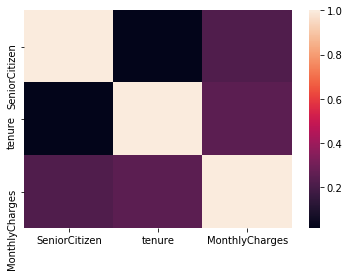

In [9]:
corr = df[continuous_var].corr()
sns.heatmap(corr)

## Information about 'Churn'

In [10]:
print(df.groupby('Churn')['PhoneService'].count())

Churn
No     5174
Yes    1869
Name: PhoneService, dtype: int64


In [11]:
# Converting Total Charges to a numerical data type.
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

The above information tells us that there are 11 missing values for TotalCharges. The step that we can take now is to remove the missing rows  and also convert our predictor variable 'Churn' to a binary numeric variable

In [12]:
#Removing missing values 
df.dropna(inplace = True)
#Remove customer IDs from the data set
df2 = df.iloc[:,1:]
#Convertin the predictor variable in a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [13]:
df_dummies.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,0.265785,0.495307,0.504693,0.517491,0.482509,0.701507,...,0.388367,0.551052,0.209329,0.239619,0.407281,0.592719,0.219283,0.216297,0.336320,0.228100
std,0.368844,24.545260,30.085974,2266.771362,0.441782,0.500014,0.500014,0.499729,0.499729,0.457629,...,0.487414,0.497422,0.406858,0.426881,0.491363,0.491363,0.413790,0.411748,0.472483,0.419637
min,0.000000,1.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.587500,401.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,55.000000,89.862500,3794.737500,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
hist(dummies$tenure)

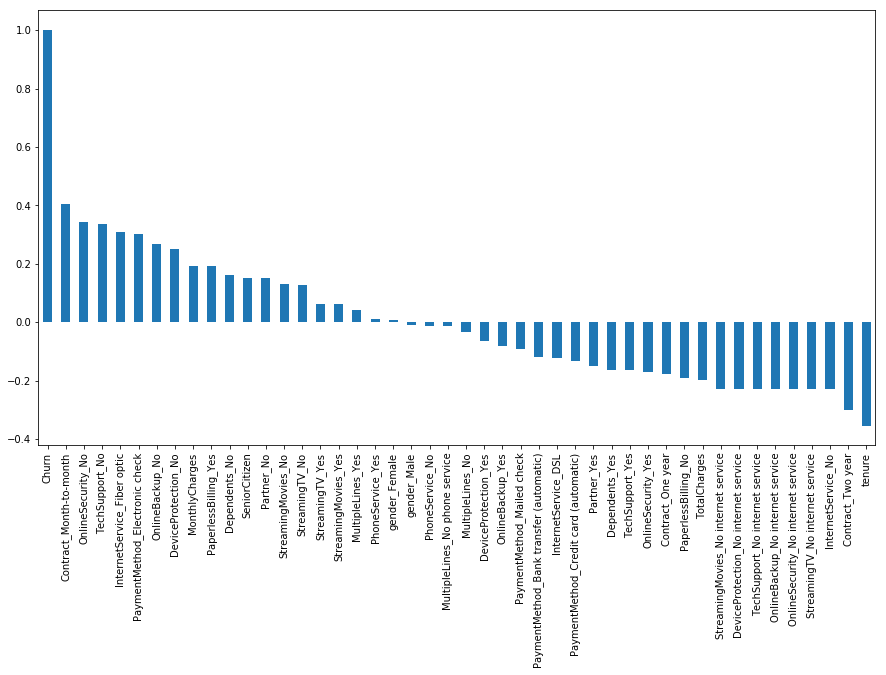

In [15]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

Month to month contracts, absence of online security and tech support seem to be positively correlated with churn. While, tenure, two year contracts seem to be negatively correlated with churn.

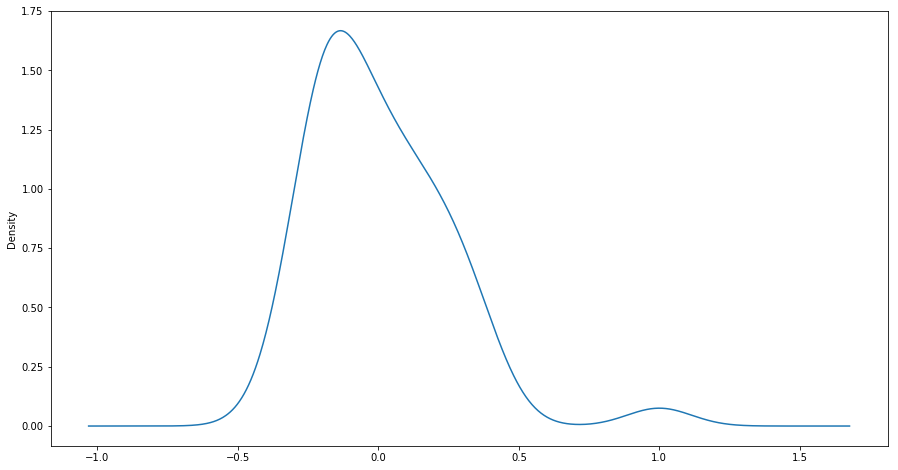

In [16]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='kde')

In [17]:

y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

Now we divide our data into training and test sets. The model_selection library of Scikit-Learn contains train_test_split method, which we'll use to randomly split the data into training and testing sets

In [18]:
#Create Train and Test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

the test_size parameter specifies the ratio of the test set, which we use to split up 20% of the data in to the test set and 80% for training.

## Training and Making Predictions

Once the data has been divided into the training and testing sets, the final step is to train the decision tree algorithm on this data and make predictions. 

In [19]:
#Running decisionTree model
model_dt = DecisionTreeClassifier(max_leaf_nodes=700,random_state=1)
model_dt.fit(X_train, y_train)



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=700,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

Now that our classifier has been trained, let's make predictions on the test data. To make predictions, the predict method of the DecisionTreeClassifier class is used

In [20]:
# Make predictions
prediction_test = model_dt.predict(X_test)
#print ((y_test, prediction_test))
print (metrics.accuracy_score(y_test, prediction_test))

0.7448471926083866


## Evaluating the Algorithm

At this point we have trained our algorithm and made some predictions. Now we'll see how accurate our algorithm is. For classification tasks  metrics we'll use confusion matrix,

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, prediction_test))
print(classification_report(y_test, prediction_test))

[[875 177]
 [182 173]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1052
           1       0.49      0.49      0.49       355

    accuracy                           0.74      1407
   macro avg       0.66      0.66      0.66      1407
weighted avg       0.74      0.74      0.74      1407



From the confusion matrix, we can see that out of 1047 test instances, our algorithm misclassified only 4. This is 74 % accuracy. Not too bad!

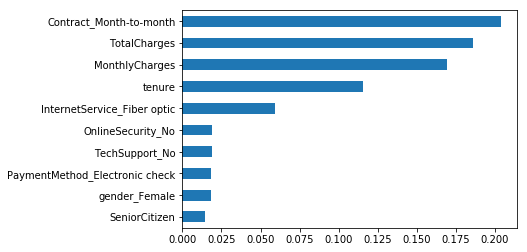

In [22]:
importances = model_dt.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

## 3. Factors used to predict churn are:

In [23]:
df_dummies.corr().style.background_gradient(cmap='Greys_r')

Now let's compare some of our predicted values with the actual values and see how accurate we were:

In [24]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':prediction_test})
df.head(10)

,Actual,Predicted
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0
5,0,0
6,0,1
7,0,0
8,1,1
9,1,0


# Logistic regression

In [25]:
# We will use the data frame where we had created dummy variables
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [26]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [27]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)



/home/nomfundo/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [28]:


from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))



0.8075829383886256


In [29]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, prediction_test)
cnf_matrix

array([[1418,  162],
       [ 244,  286]])

AxesSubplot(0.125,0.125;0.775x0.755)


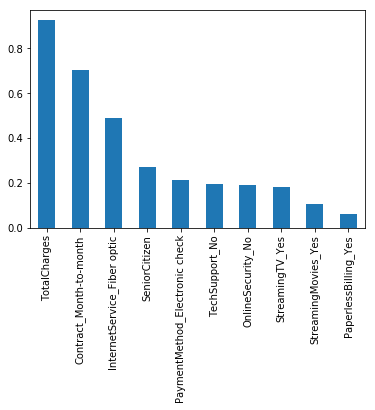

In [30]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


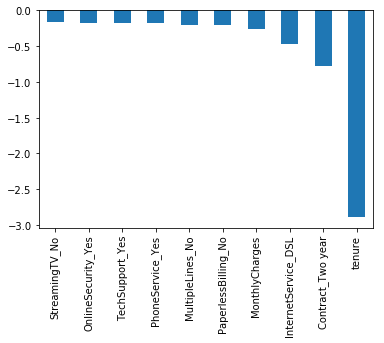

In [31]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

### Observations

We can see that some variables have a negative relation to our predicted variable (Churn), while some have positive relation. Negative relation means that likeliness of churn decreases with that variable. 

2 month contract along with tenure have the most negative relation with Churn as predicted by logistic regressions
Having DSL internet service also reduces the proability of Churn
 
Lastly, total charges, monthly contracts, fibre optic internet services and seniority can lead to higher churn rates. This is interesting because although fibre optic services are faster, customers are likely to churn because of it.